##1.-

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [2]:
#from sklearn.model_selection import train_test_split

#### Linear regression model : 
$p(y|x,\theta) = \mathcal{N}(w^{T}x,\sigma^{2})$ 
#### Non- linear model:
$p(y|x,\theta) = \mathcal{N}(w^{T}\phi(x),\sigma^{2})$ 


#### Linear regression
$J(w) = ||y_{i}-w^{T}x||^{2}$

$dJ(w)/dw = 0$

$\hat{w} = (X^{T}X)^{-1}Xy$

#### Ridge regression

$p(w) = \prod_{j} \mathcal{N}(w_{j},\tau^{2})$

$J(w) = ||y-w^{T}x||^{2} + \frac{\sigma^{2}}{\tau^{2}}||w||^{2}$

$\hat{w}_{ridge} = (\frac{\sigma^{2}}{\tau^{2}}1+X^{T}X)^{-1}Xy$

#### Bayesian regression


In [3]:
#def fake_data(t, A, sigma, omega, noise=0, n_outliers=0, random_state=0):
#    y = A * np.exp(-sigma * t) * np.sin(omega * t)
#    rnd = np.random.RandomState(random_state)
#    error = noise * rnd.randn(t.size)
#    outliers = rnd.randint(0, t.size, n_outliers)
#    error[outliers] *= 35
#    return y + error

In [ ]:
def lr(x,y):
    x1 = x-np.mean(x)
    y1 = y-np.mean(y)
    a = np.sum(x1*y1)
    b = np.sum(x1**2)
    b1 = a/b
    b0 = np.mean(y) - b1*np.mean(x)
    return b0,b1

In [72]:
class regression(object):
    
    def __init__(self, W0 = None, V0 = None, lam = 0, sigma2 = 1, degree = 1):
        self.n = degree
        self.sigma2 = sigma2
        self._lambda = lam
        #self.prior = multivariate_normal( mean = W0, cov = V0)
        if W0.all() != None and V0.all() != None : 
            self.W0 = W0.reshape( W0.shape + (1,) )
            self.V0 = V0
    
    
    def polynomial(self, x_train):
        
        X = np.ones( [len(x_train), self.n+1] )
        for i in range( 1, self.n+1):
            X[:,i] = x_train**(i)
            
        return X    
    
    def model_fit( self, x_train, y_train ):
        
        Y = y_train.reshape(np.shape(y_train) + (1,))
        #Y = y_train[:,np.newaxis] 
        X = self.polynomial( x_train )
        
        I = np.linalg.inv( np.dot(X.T,X) + self._lambda*np.identity(X.shape[1]) )
        
        self.coeff = np.dot( np.dot(I,X.T), Y)

    def posterior_dist(self, x_train, y_train):
        
        X = self.polynomial( x_train)
        #Y = y_train[:,np.newaxis]
        Y = y_train.reshape( y_train.shape + (1,))
        
        s2 = self.sigma2
    
        V0_1 = np.linalg.inv( self.V0)
        XTX = np.dot( X.T, X)
        
        self.VN = s2* np.linalg.inv( s2*V0_1 + XTX)
        
        V0_1W0 = np.dot( V0_1, self.W0)
        XTY = np.dot( X.T, Y)
        
        self.WN = np.dot( self.VN, V0_1W0 + (1/s2)*XTY ) 
        
        
        return multivariate_normal(mean = self.WN.flatten() , cov = self.VN)

    def moments(self, x_min, x_max ):
        
        
        x_  = np.linspace( x_min, x_max, 100)
        self.xrange = x_
        x_ = x_.flatten()
        X_ = self.polynomial( x_)
        
        S2 = self.sigma2 + np.dot(X_, np.dot( self.VN, X_.T))
        #S2 = 1 + np.dot(X_, np.dot(VN,X_.T))
        m = np.dot( self.WN.T, X_.T)
        
        self.mean = m.flatten()
        self.std = np.diag(S2)
        
        return self.mean, self.std
    
    def generate_data(self):#, x_min, x_max):
        data_gen = []
        for mm, ss in zip( self.mean, self.std):
           
            data_gen.append( np.random.normal(mm, ss) )
            
        return  self.xrange, np.array( data_gen )   


In [22]:
x = np.random.uniform(-2,2,100)
e = np.random.normal(0,0.5,100)

In [23]:
y1 = x + 1 + e
y2 = e - x + x**2  #+ 0.1 *x**3

In [24]:
tau2 = 2

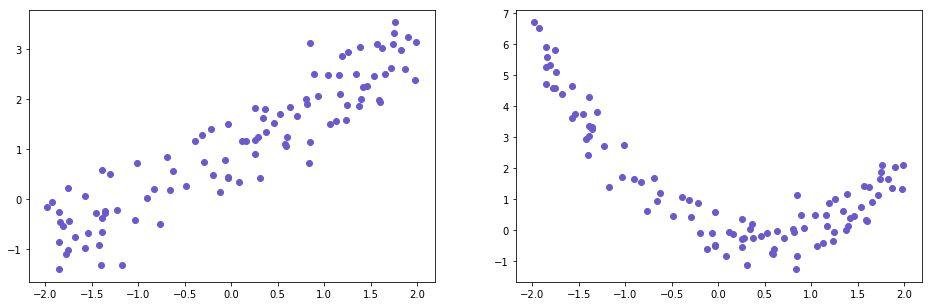

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,5))
#fig.suptitle('A tale of 2 subplots')
ax1.plot(x,y1,'o',color='slateblue')
#ax1.set_ylabel('Damped oscillation')

ax2.plot(x,y2,'o',color='slateblue')
#ax2.set_xlabel('time (s)')
#ax2.set_ylabel('Undamped')

plt.show()

In [36]:
prueba1 = regression()

In [37]:
prueba1.model_fit(x,y1)

In [39]:
w1 = prueba1.coeff

In [49]:
prueba2 = regression(degree=2)

In [50]:
prueba2.model_fit(x,y2)

In [51]:
w2 = prueba2.coeff

In [52]:
x_= np.linspace(-2,2,100)

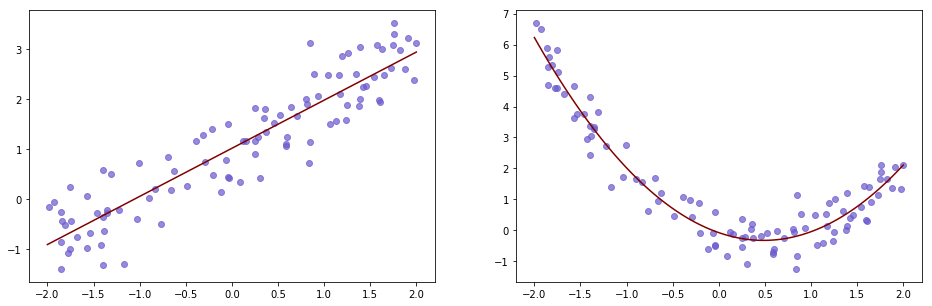

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,5))
#fig.suptitle('A tale of 2 subplots')
ax1.scatter(x,y1,alpha = 0.7,color='slateblue')
ax1.plot(x_,w1[0] + w1[1]*x_ ,color='maroon',label = 'Predicted')

#ax1.set_ylabel('Damped oscillation')

ax2.scatter(x,y2,alpha=0.7,color='slateblue')
ax2.plot(x_,w2[0] + w2[1]*x_ + w2[2]*x_**2 ,color='maroon',label = 'Predicted')

#ax2.set_xlabel('time (s)')
#ax2.set_ylabel('Undamped')

plt.show()

In [57]:
gx, gy = np.mgrid[-2:2:.1, -2:2:.1]
pos = np.empty(gx.shape + (2,))
pos[:, :, 0] = gx
pos[:, :, 1] = gy

In [58]:
v0 = tau2*np.identity(2) 
w0 = np.array([0.,0.])

In [59]:
prior = multivariate_normal(mean = w0, cov = v0)

In [60]:
samples = prior.rvs(5)

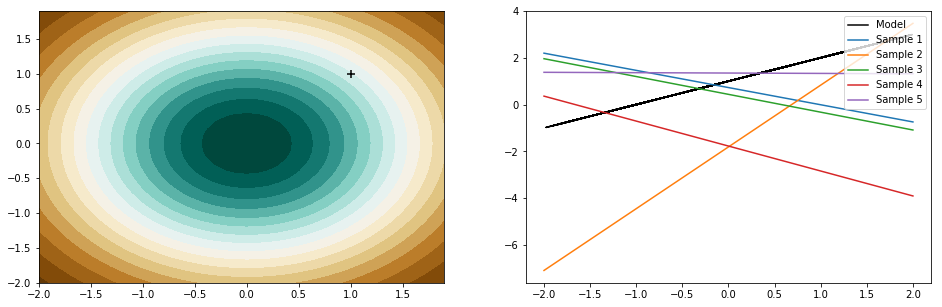

In [83]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,5))

ax1.contourf(gx,gy,prior.pdf(pos),20,cmap='BrBG')
ax1.scatter(1, 1, marker='+', c='black', s=60)

ax2.plot(x,y1 - e,color='Black',label='Model')

for i,w in enumerate(samples):
#for w in samples:    
    ax2.plot(x_, w[0] + w[1]*x_, label = 'Sample '+ str(i+1) )

    
ax2.legend(loc='upper right')

plt.show()

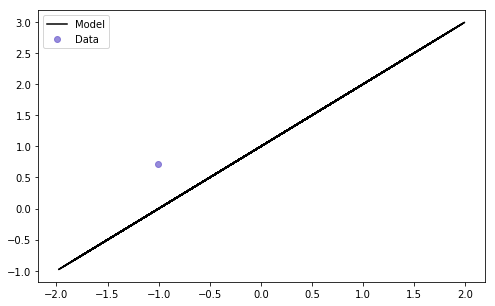

In [64]:
plt.figure( figsize = (8,5) )
plt.plot(x, y1 - e, color = 'black',label = 'Model')
plt.scatter(x[0:1], y1[0:1], alpha = 0.7, color = 'slateblue', label = 'Data')
plt.legend(loc = 'best')
plt.show()

In [73]:
prueba1_1 = regression(W0 = w0, V0 = v0, sigma2 = 0.5)

In [74]:
dist1 = prueba1_1.posterior_dist(x_train = x[0:1], y_train = y1[0:1])

In [76]:
samples2 = dist1.rvs(5)

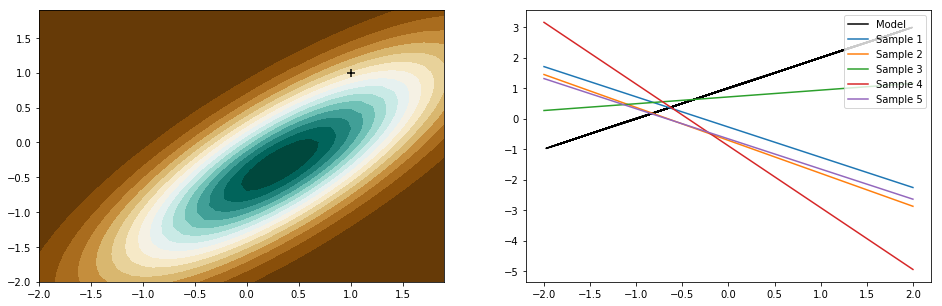

In [84]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,5))

ax1.contourf(gx,gy,dist1.pdf(pos),20,cmap='BrBG')
ax1.scatter(1,1, marker='+', c='black', s=60)

ax2.plot(x,y1 - e,color='Black',label='Model')

for i,w in enumerate(samples2):
#for w in samples:    
    ax2.plot(x_, w[0] + w[1]*x_, label = 'Sample '+ str(i+1) )

    
ax2.legend(loc='upper right')

plt.show()

In [97]:
mean, sigma = prueba1_1.moments(x_min = -2, x_max =2)

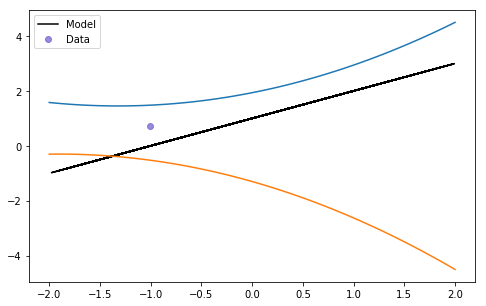

In [79]:
plt.figure( figsize = (8,5) )
plt.plot(x, y1 - e, color = 'black',label = 'Model')
plt.scatter(x[0:1], y1[0:1], alpha = 0.7, color = 'slateblue', label = 'Data')
plt.plot(x_,mean + sigma)
plt.plot(x_,mean - sigma)

plt.legend(loc = 'best')
plt.show()

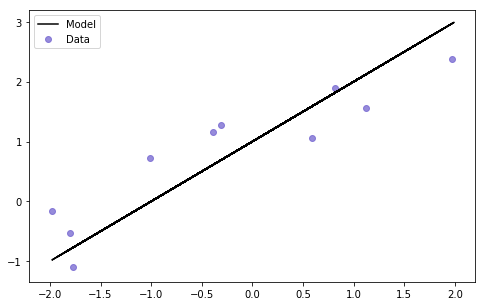

In [86]:
plt.figure( figsize = (8,5) )
plt.plot(x, y1 - e, color = 'black',label = 'Model')
plt.scatter(x[0:10], y1[0:10], alpha = 0.7, color = 'slateblue', label = 'Data')
plt.legend(loc = 'best')
plt.show()

In [80]:
dist2 = prueba1_1.posterior_dist(x_train = x[0:10], y_train = y1[0:10])

In [81]:
samples3 = dist2.rvs(5)

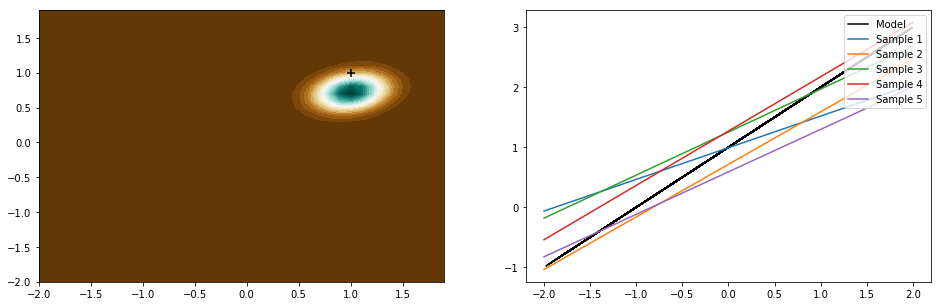

In [85]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,5))

ax1.contourf(gx,gy,dist2.pdf(pos),20,cmap='BrBG')
ax1.scatter(1, 1, marker='+', c='black', s=60)

ax2.plot(x,y1 - e,color='Black',label='Model')

for i,w in enumerate(samples3):
#for w in samples:    
    ax2.plot(x_, w[0] + w[1]*x_, label = 'Sample '+ str(i+1) )

    
ax2.legend(loc='upper right')

plt.show()

In [87]:
mean1, sigma1 = prueba1_1.moments(x_min = -1, x_max =1)

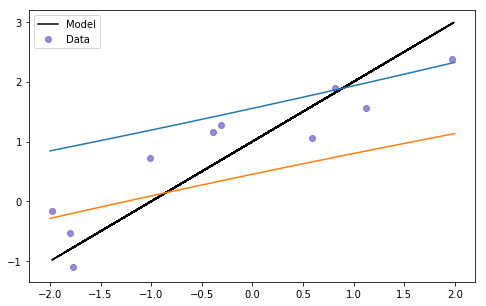

In [89]:
plt.figure( figsize = (8,5) )
plt.plot(x, y1 - e, color = 'black',label = 'Model')
plt.scatter(x[0:10], y1[0:10], alpha = 0.7, color = 'slateblue', label = 'Data')
plt.plot(x_,mean1 + sigma1)
plt.plot(x_,mean1 - sigma1)

plt.legend(loc = 'best')
plt.show()

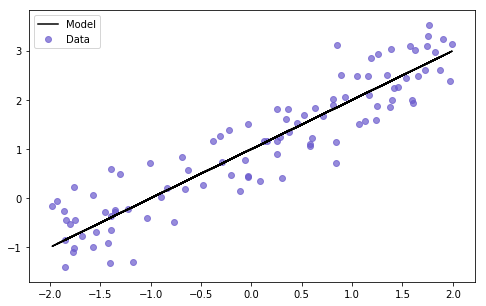

In [93]:
plt.figure( figsize = (8,5) )
plt.plot(x, y1 - e, color = 'black',label = 'Model')
plt.scatter(x, y1, alpha = 0.7, color = 'slateblue', label = 'Data')
plt.legend(loc = 'best')
plt.show()

In [91]:
dist3 = prueba1_1.posterior_dist(x_train = x, y_train = y1)

In [92]:
samples4 = dist3.rvs(5)

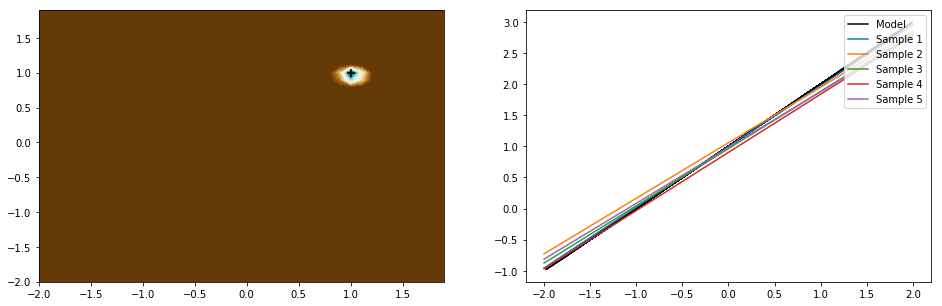

In [95]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,5))

ax1.contourf(gx,gy,dist3.pdf(pos),20,cmap='BrBG')
ax1.scatter(1,1, marker='+', c='black', s=60)

ax2.plot(x,y1 - e,color='Black',label='Model')

for i,w in enumerate(samples4):
#for w in samples:    
    ax2.plot(x_, w[0] + w[1]*x_, label = 'Sample '+ str(i+1) )

    
ax2.legend(loc='upper right')

plt.show()

In [98]:
mean3, sigma3 = prueba1_1.moments(x_min = -2, x_max =2)

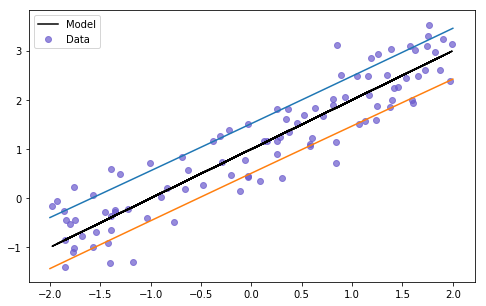

In [99]:
plt.figure( figsize = (8,5) )
plt.plot(x, y1 - e, color = 'black',label = 'Model')
plt.scatter(x, y1, alpha = 0.7, color = 'slateblue', label = 'Data')
plt.plot(x_,mean3 + sigma3)
plt.plot(x_,mean3 - sigma3)

plt.legend(loc = 'best')
plt.show()

In [100]:
new_x2, new_y2 = prueba1_1.generate_data()

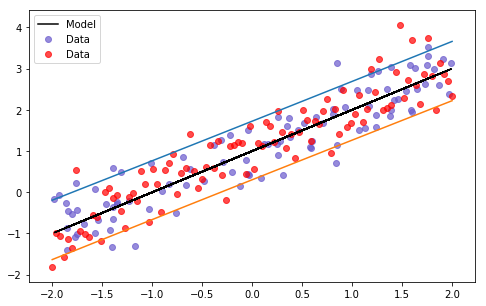

In [101]:
plt.figure( figsize = (8,5) )
plt.plot(x, y1 - e, color = 'black',label = 'Model')
plt.scatter(x, y1, alpha = 0.7, color = 'slateblue', label = 'Data')
plt.scatter(new_x2, new_y2, alpha = 0.7, color = 'red', label = 'Data')

plt.plot(x_,mean3 + np.sqrt(sigma3))
plt.plot(x_,mean3 - np.sqrt(sigma3))

plt.legend(loc = 'best')
plt.show()

In [103]:
gx, gy, gz = np.mgrid[-2:2:.1, -2:2:.1, -2:2:.1]
pos = np.empty(gx.shape + (2,))
pos[:, :, 0] = gx
pos[:, :, 1] = gy
pos[:, :, 2] = gz

ValueError: could not broadcast input array from shape (40,40,40) into shape (40,40,2)